In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load the dataset
data = pd.read_csv("/content/agrocsv.csv")

In [ ]:
data.head()

,Timestamp,First_Name,Middle_Name,Last_Name,Aadhar_Card,Mobile_Number,District,Taluka,Cultivated_Crops,Crop_Cultivation_Date,Cultivation_area_in_Knots,Age,Weather_Condition,Soil_Type
0,17-08-2023 04:27,Utkarsh,Dattatray,Khalkar,6.780000e+11,8379808859,Nashik,Niphad,Cabbage,14-10-2023,8.0,21,Rainy,Black soil
1,17-08-2023 09:12,Uttam,Ravaso,Hande,8.700000e+11,8797654678,Buldana,Khamgaon,Potato,14-05-2023,4.0,49,Summer,Black soil
2,17-08-2023 08:56,Shreyash,Sheshnath,Jadhav,7.480000e+11,7483984839,Satara,Wai,White Pumpkin,11-07-2023,2.0,69,Rainy,Alluvial Soil
3,17-08-2023 13:27,Nagoji,Pomana,Benke,2.100000e+11,9098767893,Buldana,Khamgaon,Green Chili,06-10-2023,3.0,58,Winter,Black soil
4,17-08-2023 11:09,Ramdas,Banda,Gharal,9.950000e+11,7890654432,Nashik,Niphad,Fenugreek,10-08-2023,2.0,60,Rainy,Black soil


In [ ]:
data.tail()

,Timestamp,First_Name,Middle_Name,Last_Name,Aadhar_Card,Mobile_Number,District,Taluka,Cultivated_Crops,Crop_Cultivation_Date,Cultivation_area_in_Knots,Age,Weather_Condition,Soil_Type
203,08-10-2023 00:03,Abhishek,Rajkumar,Gaikwad,5.790000e+11,7890123456,Sangli,Tasgaon,Green Chili,14-08-2023,65.0,54,Rainy,Alluvial Soil
204,08-10-2023 04:39,Pruthviraj,Mahadev,Patil,9.290000e+11,7796009200,Sangli,Tasgaon,Brinjal/Eggplant,01-09-2023,92.0,22,Rainy,Black soil
205,08-10-2023 09:11,Gulabrao,Babaji,Patil,6.070000e+11,6375296001,Nashik,Niphad,Tomato,11-10-2023,5.0,68,Rainy,Black soil
206,08-10-2023 13:50,Machindra,Bajaba,Chaudhari,4.260000e+11,9826462719,Sangli,Tasgaon,Peas,10-05-2023,4.0,38,Summer,Black soil
207,08-10-2023 17:24,Umesh,Chandrakant,Pote,5.270000e+11,7732564580,Satara,Wai,Carrot,07-03-2023,4.0,45,Summer,Alluvial Soil


In [ ]:
data.describe()

,Aadhar_Card,Mobile_Number,Cultivation_area_in_Knots,Age
count,1.980000e+02,2.080000e+02,208.000000,208.000000
mean,6.599949e+11,8.779178e+09,22.699519,49.673077
std,2.197916e+11,8.590025e+08,23.689565,12.637604
min,1.480000e+11,6.375296e+09,1.000000,21.000000
25%,4.750000e+11,7.895083e+09,5.000000,42.000000
50%,7.120000e+11,8.907654e+09,12.000000,49.000000
75%,8.490000e+11,9.607288e+09,34.000000,59.000000
max,9.950000e+11,9.991827e+09,99.000000,78.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  208 non-null    object 
 1   First_Name                 208 non-null    object 
 2   Middle_Name                208 non-null    object 
 3   Last_Name                  208 non-null    object 
 4   Aadhar_Card                198 non-null    float64
 5   Mobile_Number              208 non-null    int64  
 6   District                   208 non-null    object 
 7   Taluka                     208 non-null    object 
 8   Cultivated_Crops           208 non-null    object 
 9   Crop_Cultivation_Date      208 non-null    object 
 10  Cultivation_area_in_Knots  208 non-null    float64
 11  Age                        208 non-null    int64  
 12  Weather_Condition          208 non-null    object 
 13  Soil_Type                  208 non-null    object 

In [ ]:
# Drop unnecessary columns
data.drop(["Timestamp","First_Name", "Middle_Name", "Last_Name", "Aadhar_Card", "Mobile_Number", "Age", "Cultivation_area_in_Knots"], axis=1, inplace=True)

In [ ]:
data.head()

,District,Taluka,Cultivated_Crops,Crop_Cultivation_Date,Weather_Condition,Soil_Type
0,Nashik,Niphad,Cabbage,14-10-2023,Rainy,Black soil
1,Buldana,Khamgaon,Potato,14-05-2023,Summer,Black soil
2,Satara,Wai,White Pumpkin,11-07-2023,Rainy,Alluvial Soil
3,Buldana,Khamgaon,Green Chili,06-10-2023,Winter,Black soil
4,Nashik,Niphad,Fenugreek,10-08-2023,Rainy,Black soil


In [ ]:
# Check for missing values and drop rows with missing values
data.dropna(inplace=True)

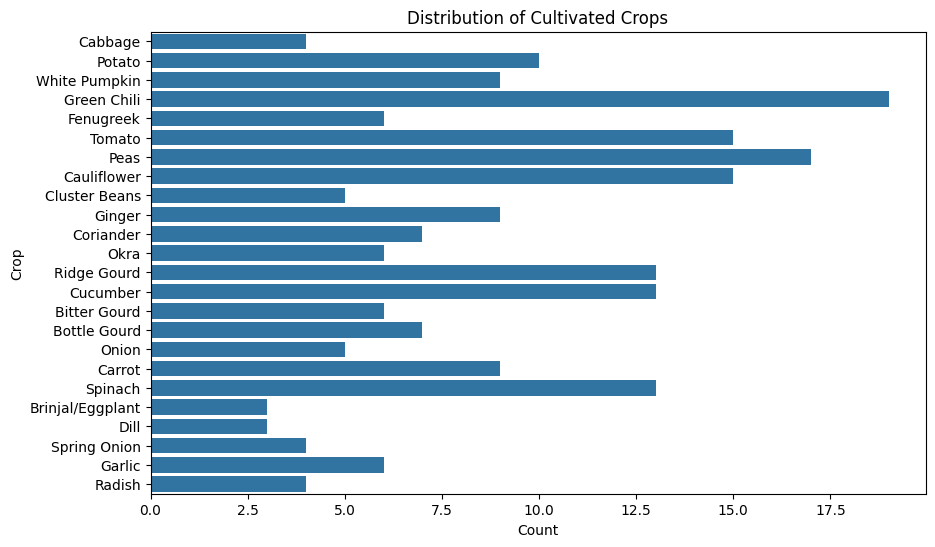

In [ ]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(y="Cultivated_Crops", data=data)
plt.title("Distribution of Cultivated Crops")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.show()

In [ ]:
# Select relevant columns
selected_columns = ["District", "Taluka", "Crop_Cultivation_Date", "Weather_Condition", "Soil_Type", "Cultivated_Crops"]

In [ ]:
# Extract and preprocess features
X = data[selected_columns[:-1]]  # Features
X["Crop_Cultivation_Date"] = pd.to_datetime(X["Crop_Cultivation_Date"], format='%d-%m-%Y')
X["Month"] = X["Crop_Cultivation_Date"].dt.month
X = X.drop("Crop_Cultivation_Date", axis=1)
encoder = OneHotEncoder(drop="first", sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[["District", "Taluka", "Weather_Condition", "Soil_Type"]]))
X_encoded.columns = encoder.get_feature_names_out(["District", "Taluka", "Weather_Condition", "Soil_Type"])
X = pd.concat([X_encoded, X[["Month"]]], axis=1)

<ipython-input-12-fd5fa5579ac3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Crop_Cultivation_Date"] = pd.to_datetime(X["Crop_Cultivation_Date"], format='%d-%m-%Y')
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Extract outcome
y = data["Cultivated_Crops"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediction on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Save the trained model to a file (for future use in production)
import joblib
joblib.dump(rf_model, "crop_prediction_model.joblib")

['crop_prediction_model.joblib']

In [ ]:
# Below is prediction Code

In [ ]:
# Production prediction for a new data point
new_data_point = pd.DataFrame({
    "District": ["Buldana"],
    "Taluka": ["Khamgaon"],
    "Weather_Condition": ["Rainy"],
    "Soil_Type": ["Black soil"],
    "Month": [8]  # Provide the month value
})

# Encode and preprocess the new data point
new_data_encoded = pd.DataFrame(encoder.transform(new_data_point[["District", "Taluka", "Weather_Condition", "Soil_Type"]]))
new_data_encoded.columns = encoder.get_feature_names_out(["District", "Taluka", "Weather_Condition", "Soil_Type"])
new_data_point = pd.concat([new_data_encoded, new_data_point[["Month"]]], axis=1)


# Load the trained model
loaded_model = joblib.load("crop_prediction_model.joblib")

# Make a prediction for the new data point
prediction = loaded_model.predict(new_data_point)
print(f"Predicted Crop: {prediction[0]}")

Predicted Crop: Spinach


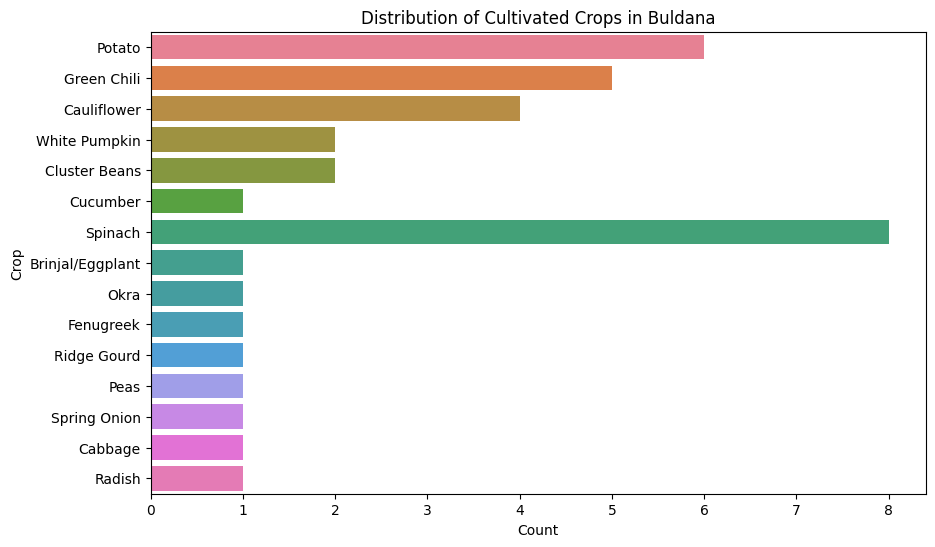

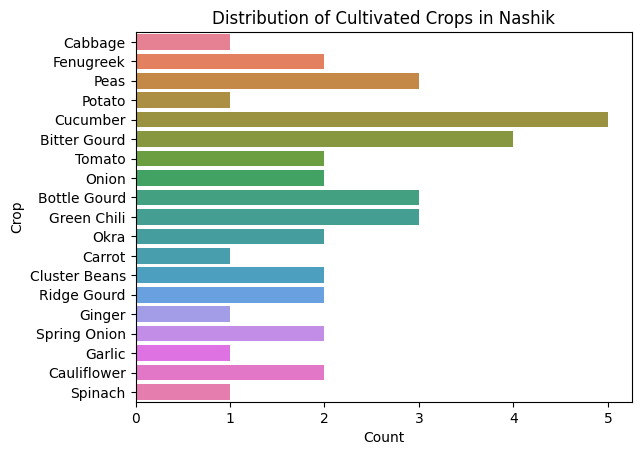

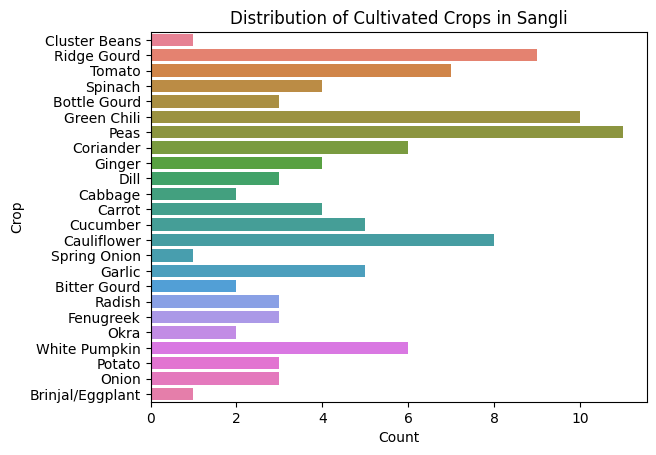

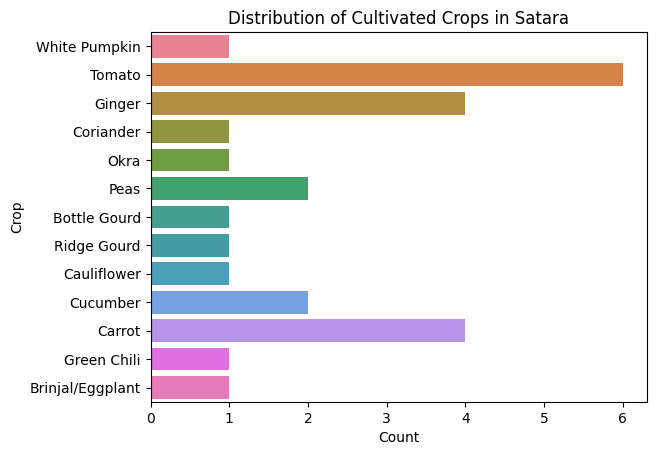

In [ ]:
# Filter data by District and Cultivated_Crops
district_wise_crops = data[selected_columns].groupby('District')['Cultivated_Crops'].value_counts()

# Data Visualization
plt.figure(figsize=(10, 6))
for district, crops in district_wise_crops.groupby('District'):
    sns.countplot(y='Cultivated_Crops', hue='Cultivated_Crops', data=data[data['District'] == district])
    plt.title(f"Distribution of Cultivated Crops in {district}")
    plt.xlabel("Count")
    plt.ylabel("Crop")
    plt.show()

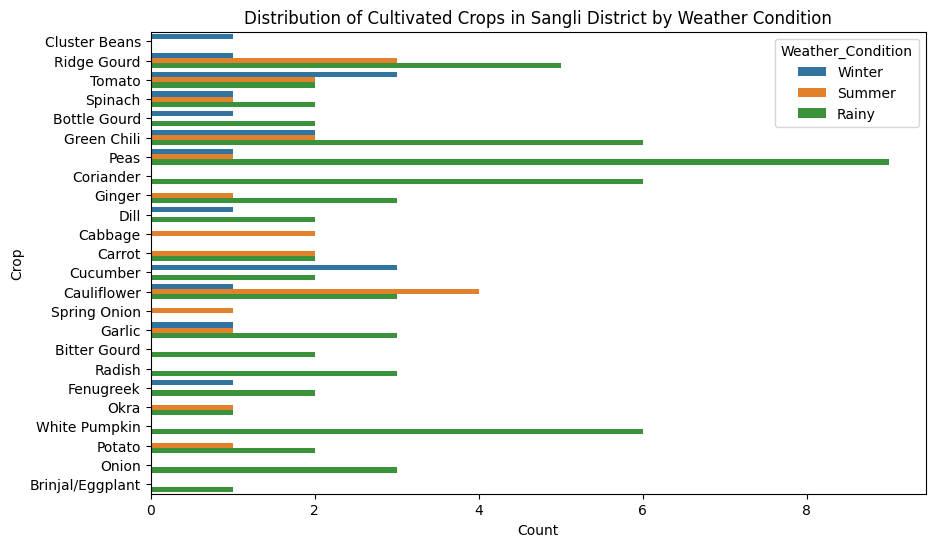

In [ ]:
# Filter data for Sangli district
sangli_data = data[data['District'] == 'Sangli']

# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(y='Cultivated_Crops', hue='Weather_Condition', data=sangli_data)
plt.title("Distribution of Cultivated Crops in Sangli District by Weather Condition")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.show()

In [ ]:
X = data[selected_columns[:-1]]  # Features

# Update selected_columns to include only "District", "Taluka", and "Weather_Condition"
selected_columns = ["District", "Taluka", "Weather_Condition"]

encoder = OneHotEncoder(drop="first", sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[selected_columns]))
X_encoded.columns = encoder.get_feature_names_out(selected_columns)
X = X_encoded

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediction on the test set
y_pred = rf_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Save the trained model to a file (for future use in production)
import joblib
joblib.dump(rf_model, "crop_prediction_model.joblib")

['crop_prediction_model.joblib']

In [ ]:
loaded_model = joblib.load("crop_prediction_model.joblib")
new_data_point = pd.DataFrame({
    "District": ["Sangli"],
    "Taluka": ["Tasgaon"],
    "Weather_Condition": ["Rainy"]
})

# Encode and preprocess the new data point
new_data_encoded = pd.DataFrame(encoder.transform(new_data_point[["District", "Taluka", "Weather_Condition"]]))
new_data_encoded.columns = encoder.get_feature_names_out(["District", "Taluka", "Weather_Condition"])

# Make a prediction for the new data point
prediction = loaded_model.predict(new_data_encoded)
print(f"Predicted Crop: {prediction[0]}")

Predicted Crop: Peas


In [ ]:

loaded_model = joblib.load("crop_prediction_model.joblib")
new_data_point = pd.DataFrame({
    "District": ["Sangli"],
    "Taluka": ["Tasgaon"],
    "Weather_Condition": ["Rainy"]
})

# Encode and preprocess the new data point
new_data_encoded = pd.DataFrame(encoder.transform(new_data_point[["District", "Taluka", "Weather_Condition"]]))
new_data_encoded.columns = encoder.get_feature_names_out(["District", "Taluka", "Weather_Condition"])

# Make a prediction for the new data point
prediction_probabilities = loaded_model.predict_proba(new_data_encoded)

# Find the index of the class with the minimum probability
min_cultivated_crop_index = np.argmin(prediction_probabilities)

# Get the name of the crop with the minimum probability
min_cultivated_crop = loaded_model.classes_[min_cultivated_crop_index]

print(f"Predicted Crop: {min_cultivated_crop}")


Predicted Crop: Cabbage
